In [14]:
!pip install opencv-python
!pip install matplotlib

Pencil sketch created: sketch_result.jpg


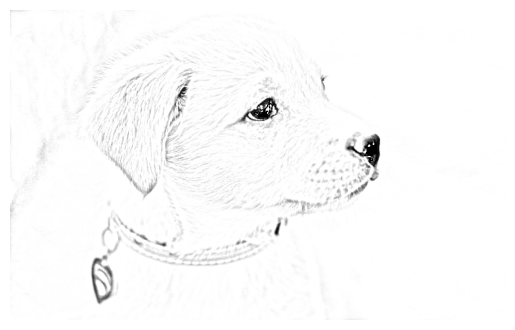

In [27]:
import cv2
import matplotlib.pyplot as plt  # Library for image display

#Step 1: Read the image
# Since OpenCV may have issues with Unicode paths, use numpy + with open to read the image
path = "D:\\Work_Study\\Information Technology\\Data\\Learning\\Data Project\\Stratascratch\\Image to Pencil Sketch\\datasets\\dog.jpg"

# Read image in binary mode to avoid path encoding issues
with open(path, 'rb') as f:
    data = f.read()
image = cv2.imdecode(np.frombuffer(data, np.uint8), cv2.IMREAD_COLOR)

if image is None:
    print("Image not found, please check the path!")
    exit()

# Step 2: Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  
# Converts from BGR color format to grayscale

# Step 3: Apply Gaussian blur to the grayscale image
blur_image = cv2.GaussianBlur(gray_image, (21, 21), 0)  
# Small kernel (3x3, 5x5): slight blur, details preserved
# Large kernel (21x21, 31x31): heavy blur, only large light/dark regions remain

# Step 4: Create sketch effect using division
sketch_image = cv2.divide(gray_image, blur_image, scale=256.0)  
# scale=256.0 because grayscale images have 256 intensity levels (0–255).
# Division enhances edges and creates a pencil-sketch effect.

# Step 5: Save the output sketch
cv2.imwrite("sketch_result.jpg", sketch_image)
print("Pencil sketch created: sketch_result.jpg")

# Step 6: Display the image
plt.imshow(sketch_image, cmap="gray")  # "gray" colormap to display grayscale properly
plt.axis("off")  # Hide X and Y axes for cleaner visualization
plt.show()